Information - For this task of binary classification, which is the prediction of two labels, I have used the "penguins" dataset, whereby my target varaible i.e. the thing I will be predicting is the sex of the penguin based on the other variables

This jupyter notebook contains exploratory data analysis, which is useful for learning about the dataset, determining the transformations required to clean the data as well as feature engineering steps.

Please see scripts/1_binary_classification_example.py for the model creation and evaluation in the form of a pipeline.

In [21]:
import seaborn as sns

In [22]:
# Load the data
penguins = sns.load_dataset("penguins")

In [23]:
# Take a look at 10 sample from the iris dataset, each row is one observation of a penguin, and its individual characteristics
penguins.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
188,Chinstrap,Dream,47.6,18.3,195.0,3850.0,Female
300,Gentoo,Biscoe,49.1,14.5,212.0,4625.0,Female
151,Adelie,Dream,41.5,18.5,201.0,4000.0,Male
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,Male
157,Chinstrap,Dream,45.2,17.8,198.0,3950.0,Female
296,Gentoo,Biscoe,47.5,14.2,209.0,4600.0,Female
41,Adelie,Dream,40.8,18.4,195.0,3900.0,Male
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,Male
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,Male
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,Male


In [24]:
# Lets do a quick exploratory data analysis (EDA)
print("Rows x Columns =", penguins.shape, "\n")
print("Feature names =", penguins.columns, "\n")
print(penguins.info())

Rows x Columns = (344, 7) 

Feature names = Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [25]:
# Continuous variable statistics
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


[Text(0.5, 1.0, 'Distribution of Species')]

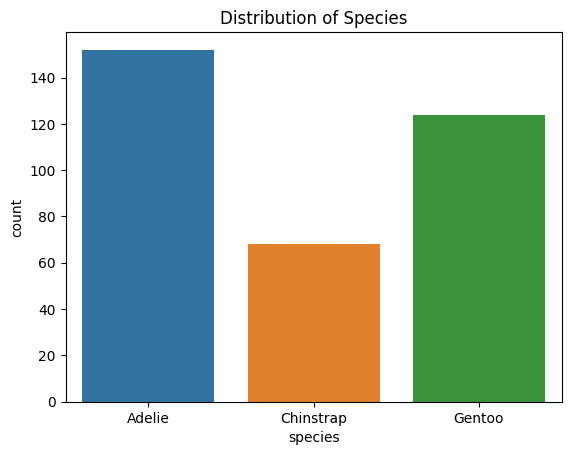

In [26]:
sns.countplot(data=penguins, x="species").set(title="Distribution of Species")

[Text(0.5, 1.0, 'Distribution of Island')]

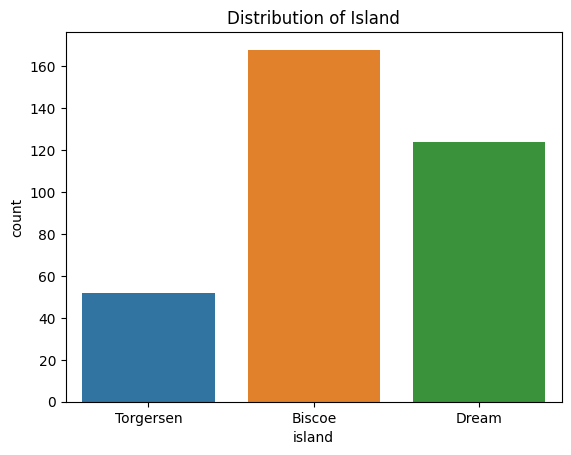

In [27]:
sns.countplot(data=penguins, x="island").set(title="Distribution of Island")

[Text(0.5, 1.0, 'Distribution of Sex')]

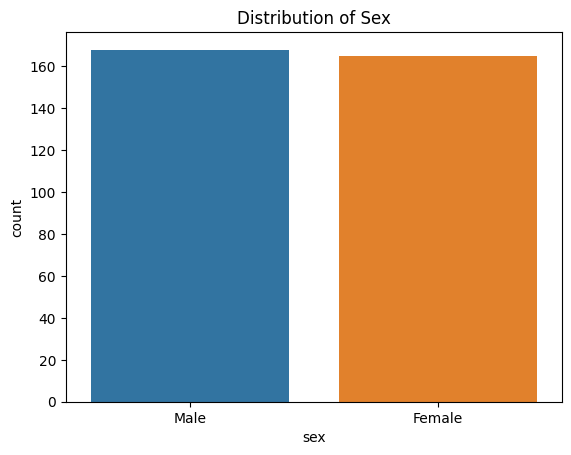

In [28]:
sns.countplot(data=penguins, x="sex").set(title="Distribution of Sex")

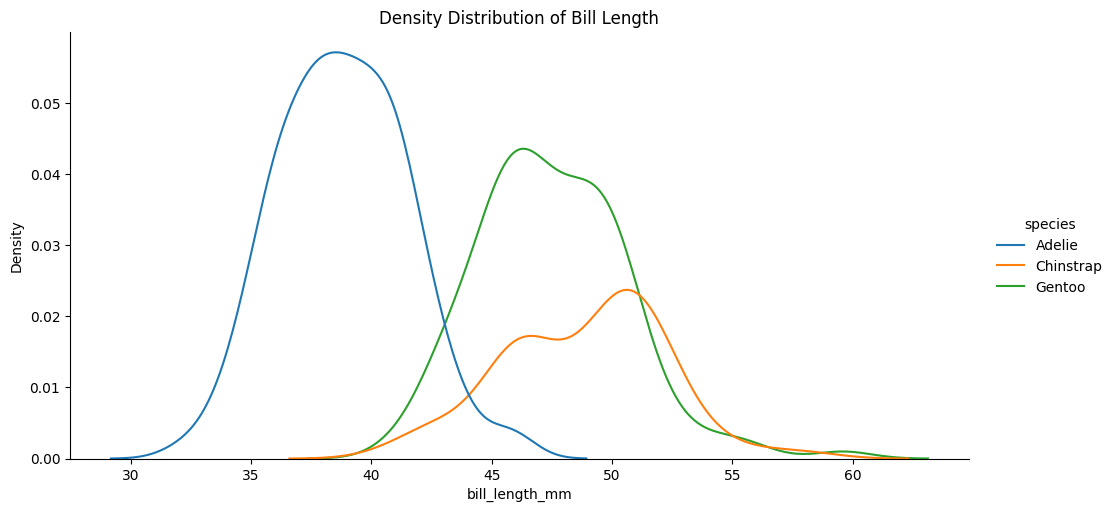

In [29]:
sns.displot(data=penguins, kind="kde", x="bill_length_mm", hue="species", aspect=2).set(title="Density Distribution of Bill Length")

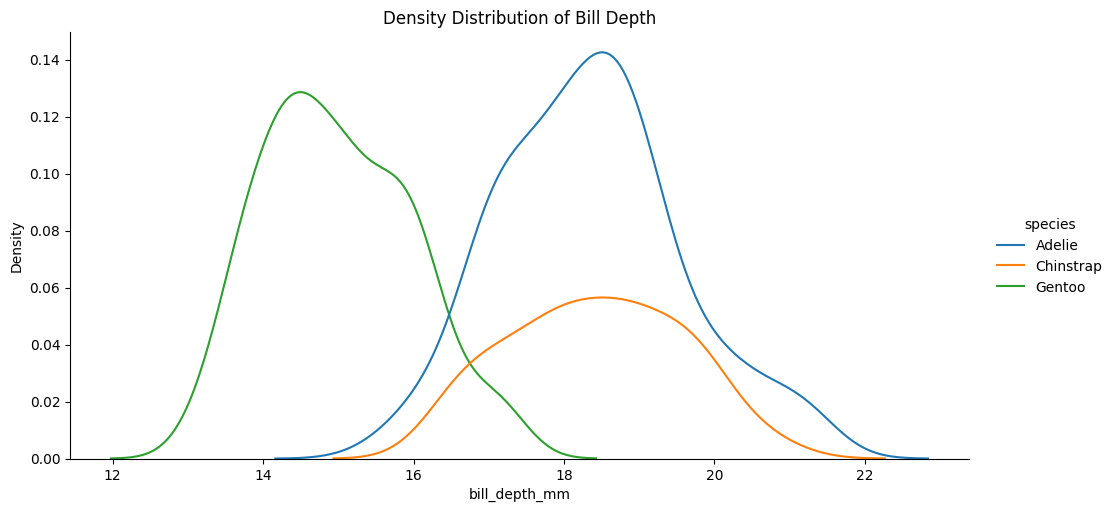

In [30]:
sns.displot(data=penguins, kind="kde", x="bill_depth_mm", hue="species", aspect=2).set(title="Density Distribution of Bill Depth")

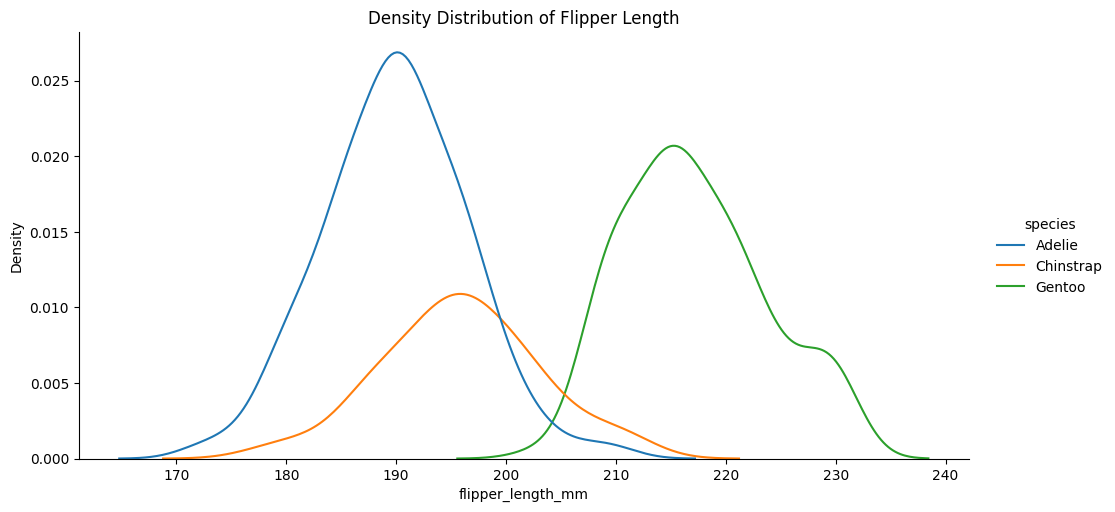

In [31]:
sns.displot(data=penguins, kind="kde", x="flipper_length_mm", hue="species", aspect=2).set(title="Density Distribution of Flipper Length")

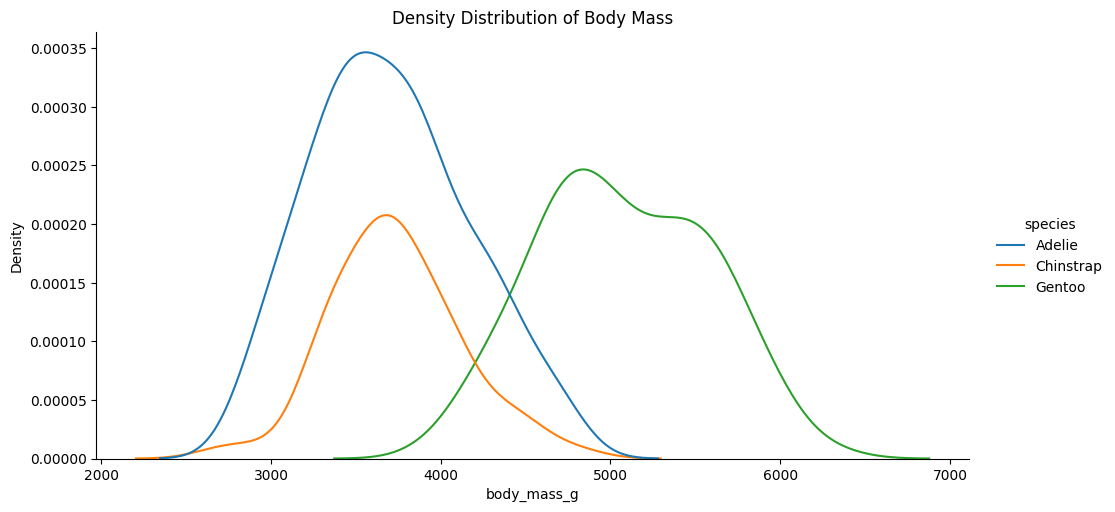

In [32]:
sns.displot(data=penguins, kind="kde", x="body_mass_g", hue="species", aspect=2).set(title="Density Distribution of Body Mass")

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

pd.options.mode.chained_assignment = None

# Create a SimpleImputer Class
imputer = SimpleImputer(missing_values=np.NaN, strategy="median")

# Fit the columns to the object
columns = ["bill_depth_mm", "bill_length_mm", "flipper_length_mm", "body_mass_g"]
imputer = imputer.fit(penguins[columns])

# Transform the DataFrames column with the fitted data
penguins[columns] = imputer.transform(penguins[columns])

# One-hot Encoding the Island Feature
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(penguins[["island"]])
penguins[one_hot.categories_[0]] = encoded.toarray()

# One-hot Encoding the Species Feature
encoded = one_hot.fit_transform(penguins[["species"]])
penguins[one_hot.categories_[0]] = encoded.toarray()

penguins["sex"] = penguins["sex"].fillna("Unknown")
penguins = penguins[penguins["sex"] != "Unknown"]

penguins["sex_int"] = penguins.loc[:, "sex"].map({"Male": 0, "Female": 1})

In [38]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,Adelie,Chinstrap,Gentoo,sex_int
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.225174,0.032118,-0.367821,-0.836409,0.449098,0.488256,-0.344078
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.626230,0.457326,0.265173,0.531342,0.323505,-0.822293,-0.372673
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.601126,-0.425459,-0.273304,-0.685947,-0.186175,0.866854,-0.255169
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.623702,-0.464666,-0.251369,-0.550479,-0.298622,0.821178,-0.424987
Biscoe,0.225174,-0.626230,0.601126,0.623702,1.000000,-0.749398,-0.396949,-0.332518,-0.496022,0.761548,-0.009201
Dream,0.032118,0.457326,-0.425459,-0.464666,-0.749398,1.000000,-0.310248,0.013443,0.661894,-0.570702,0.000673
Torgersen,-0.367821,0.265173,-0.273304,-0.251369,-0.396949,-0.310248,1.000000,0.458786,-0.205351,-0.302296,0.012278
Adelie,-0.836409,0.531342,-0.685947,-0.550479,-0.332518,0.013443,0.458786,1.000000,-0.447597,-0.658904,0.007961
Chinstrap,0.449098,0.323505,-0.186175,-0.298622,-0.496022,0.661894,-0.205351,-0.447597,1.000000,-0.377744,0.004564
Gentoo,0.488256,-0.822293,0.866854,0.821178,0.761548,-0.570702,-0.302296,-0.658904,-0.377744,1.000000,-0.012082


[Text(0.5, 1.0, 'Heatmap of Correlations')]

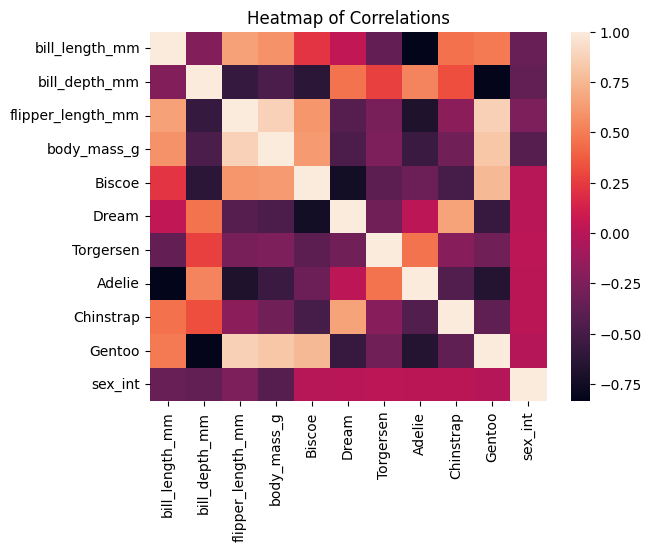

In [39]:
# Heatmap of raw correlation values
sns.heatmap(penguins.corr()).set(title="Heatmap of Correlations")

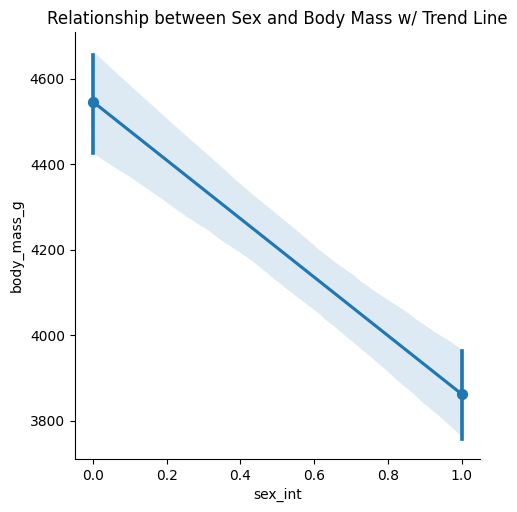

In [41]:
import numpy as np
sns.lmplot(data=penguins, x="sex_int", y="body_mass_g", x_estimator=np.mean).set(title="Relationship between Sex and Body Mass w/ Trend Line")

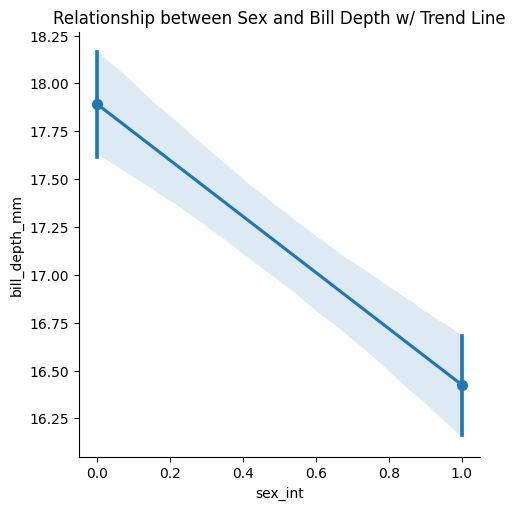

In [43]:
sns.lmplot(data=penguins, x="sex_int", y="bill_depth_mm", x_estimator=np.mean).set(title="Relationship between Sex and Bill Depth w/ Trend Line")

Recommendations and key observations -
1) Small dataset of 344 rows, use 5-fold cross validation
2) Impute missing values with median, but drop missing sex (target, can't be imputed with mode)
3) Dataset has almost class balance for the target
4) Distribution could be made artificially equal with oversampling techniques
5) Use Logistic Regression as baseline, observe performance increase with Random Forests + hyperparam optimisation
6) Use all variables, no multicollinearity
7) Encode target with binary encoding
8) OHE species, island, low cardinality
9) No need to normalise as all measured on same scale with similar ranges
10) All predictors are extremely strong, with good seperation in the distributions by species